<a href="https://colab.research.google.com/github/ai7dnn/2020-Winter-Py-DNN/blob/main/tf%20code/06_neuron_activation_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

# 활성화 함수

In [2]:
import numpy as np
np.e

2.718281828459045

In [14]:
x = np.linspace(0, 1, 3)
x

array([0. , 0.5, 1. ])

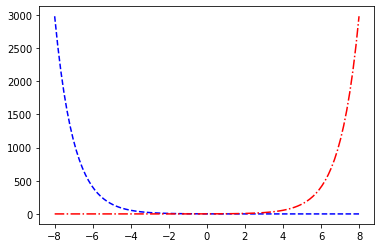

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_ = plt.plot(x, np.exp(x), 'r-.')

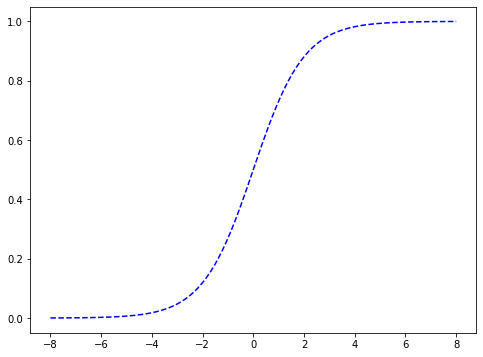

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
x = np.linspace(-8, 8, 100)
plt.figure(figsize=(8, 6)) 
plt.plot(x, sigm_func(x), 'b--')

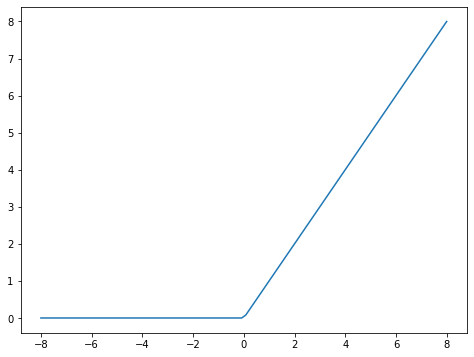

In [8]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

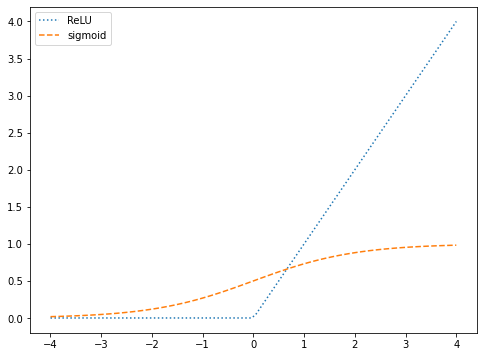

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

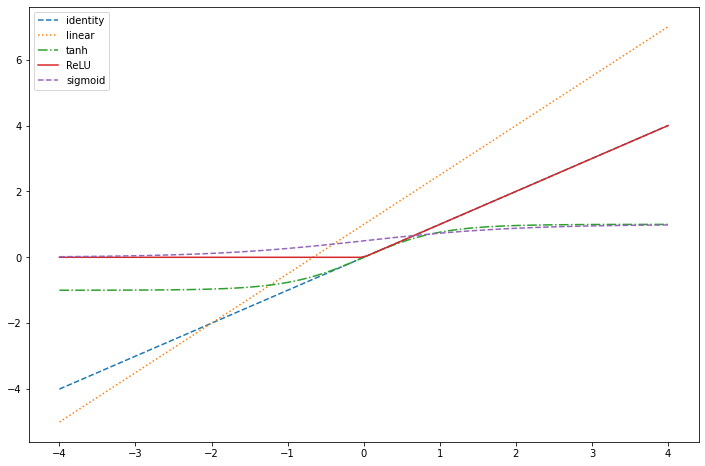

In [17]:
import numpy as np
import matplotlib.pylab as plt
 
def identity_func(x): # 항등함수
    return x
  
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

def tanh_func(x): # TanH 함수
    return np.tanh(x)

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(12, 8)) 
x = np.linspace(-4, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

## 뉴런의 행렬 연산

In [18]:
x = [[1, 2]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[ 9, 12, 15]], dtype=int32)

In [19]:
x = [[6, 5]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48]], dtype=int32)

In [20]:
x = [[6, 5], [4, 7], [5, 6], [6, 7]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48],
       [32, 43, 54],
       [29, 40, 51],
       [34, 47, 60]], dtype=int32)

In [21]:
#x = [[6, 5], [4, 7], [5, 6], [6, 7]]
#w = [[1, 2, 3], [4, 5, 6]]

w = [[1, 4], [2, 5], [3, 6]]
x = [[6, 4, 5, 6], [5, 7, 6, 7]]

y = tf.matmul(w, x)
y.numpy()

array([[26, 32, 29, 34],
       [37, 43, 40, 47],
       [48, 54, 51, 60]], dtype=int32)

# 케라스로 AND 구현하기

In [26]:
# tf.keras 를 이용한 AND 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x, y, epochs=400, batch_size=1)

Epoch 1/400
4/4 [==============================] - 2s 3ms/step - loss: 0.2840
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2292
Epoch 4/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1765
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1462
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1639
Epoch 9/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 10/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1256
Epoch 11/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1725
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1084
Epoch 13/400
4/4 [==============================] - 0s 2ms/st

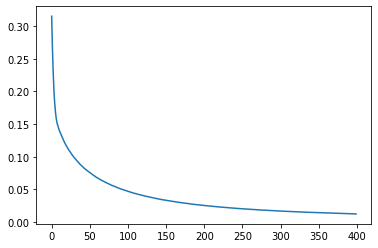

In [29]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [30]:
model.predict(x)

array([[0.857535  ],
       [0.11871149],
       [0.11857197],
       [0.00300138]], dtype=float32)

In [31]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.8009894],
       [3.799655 ]], dtype=float32)>
<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-5.8056784], dtype=float32)>


In [32]:
model.weights[0]

<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.8009894],
       [3.799655 ]], dtype=float32)>

In [33]:
model.weights[1]

<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-5.8056784], dtype=float32)>

# 케라스로 OR 구현하기

In [8]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
import tensorflow as tf

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

#batch_size: Integer or `None`.
#            Number of samples per gradient update.
#            If unspecified, `batch_size` will default to 32.
history = model.fit(x, y, epochs=500, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1992
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1799
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1213
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1499
Epoch 9/500
4/4 [=============

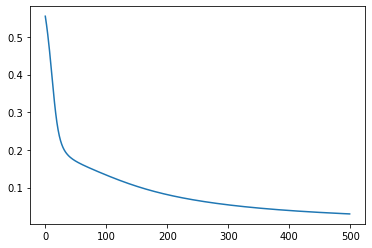

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [4]:
model.predict(x)

array([[0.98797196],
       [0.8464132 ],
       [0.84440583],
       [0.26692283]], dtype=float32)

In [38]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[4.783151 ],
       [4.7794065]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-2.125954], dtype=float32)>


# XOR 구현

### XOR 문제(problem) 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2381
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2316
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 9/500
4/4 [=============

array([[0.47604942],
       [0.48763913],
       [0.49069157],
       [0.502296  ]], dtype=float32)

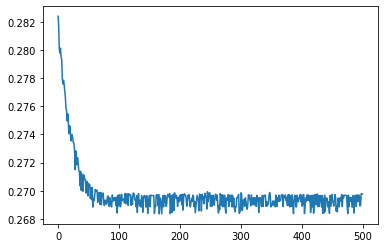

In [64]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x, y, epochs=500, batch_size=1)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])


In [65]:
model.predict(x)

array([[0.47604942],
       [0.48763913],
       [0.49069157],
       [0.502296  ]], dtype=float32)

### MLP로 해결

In [59]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [60]:
#history = model.fit(x, y, epochs=1500)
history = model.fit(x, y, epochs=1500, batch_size=1)

Epoch 1/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.3007
Epoch 2/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 3/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 4/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 5/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2469
Epoch 6/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 7/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2523
Epoch 8/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2442
Epoch 9/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2405
Epoch 10/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 11/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2405
Epoch 12/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 13/1500
4/4 [==============================

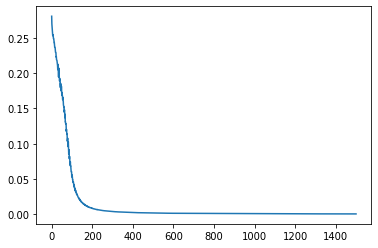

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [62]:
model.predict(x)

array([[0.01228257],
       [0.9852964 ],
       [0.98530304],
       [0.03141639]], dtype=float32)

In [63]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)
    print()

<tf.Variable 'dense_10/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.5378685 ,  2.7300339 ,  1.5117285 ,  2.3630214 ],
       [-0.12491655,  2.730105  ,  1.5115756 ,  2.3631618 ]],
      dtype=float32)>

<tf.Variable 'dense_10/bias:0' shape=(4,) dtype=float32, numpy=
array([ 0.0000000e+00, -2.7303116e+00, -1.5119081e+00, -2.6918334e-04],
      dtype=float32)>

<tf.Variable 'dense_11/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[-0.43899065],
       [-4.5592494 ],
       [-2.5015223 ],
       [ 3.2307072 ]], dtype=float32)>

<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([-3.4285052], dtype=float32)>



In [47]:
model.weights[0]

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.7297516, -4.4303102],
       [ 6.40031  ,  4.3803754]], dtype=float32)>

In [48]:
model.weights[1]

<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.9040673, -2.395769 ], dtype=float32)>

In [49]:
model.weights[2]

<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-6.819525 ],
       [ 7.4170785]], dtype=float32)>

In [50]:
model.weights[3]

<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([3.0915804], dtype=float32)>